#  Homework 5
## MBIO612
### Gabrielle Martineau

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

-- Column specification -------------------------------------------------------

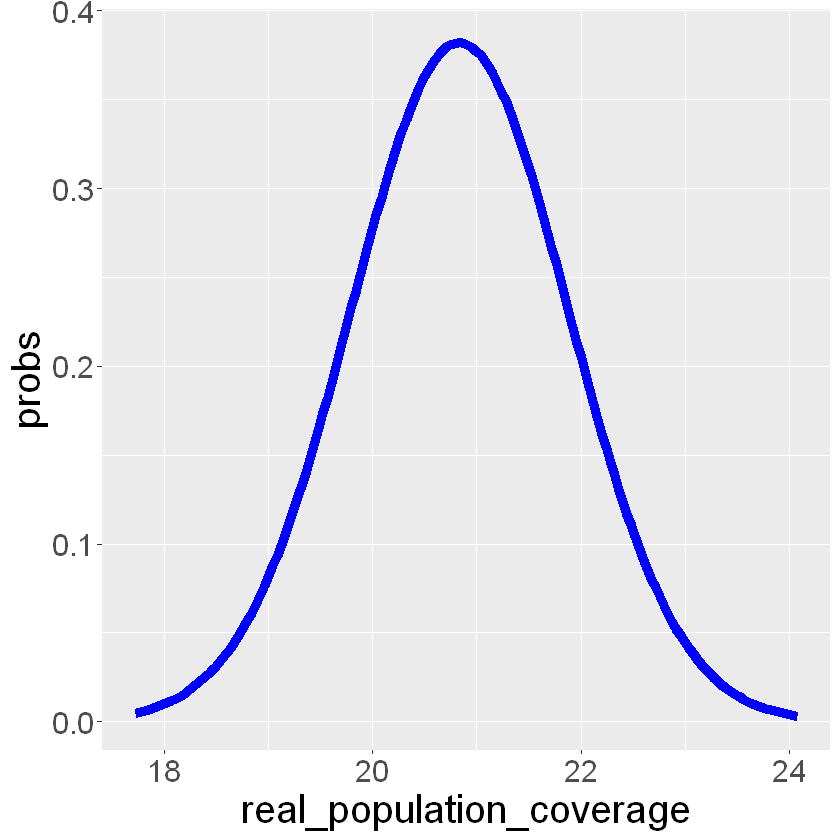

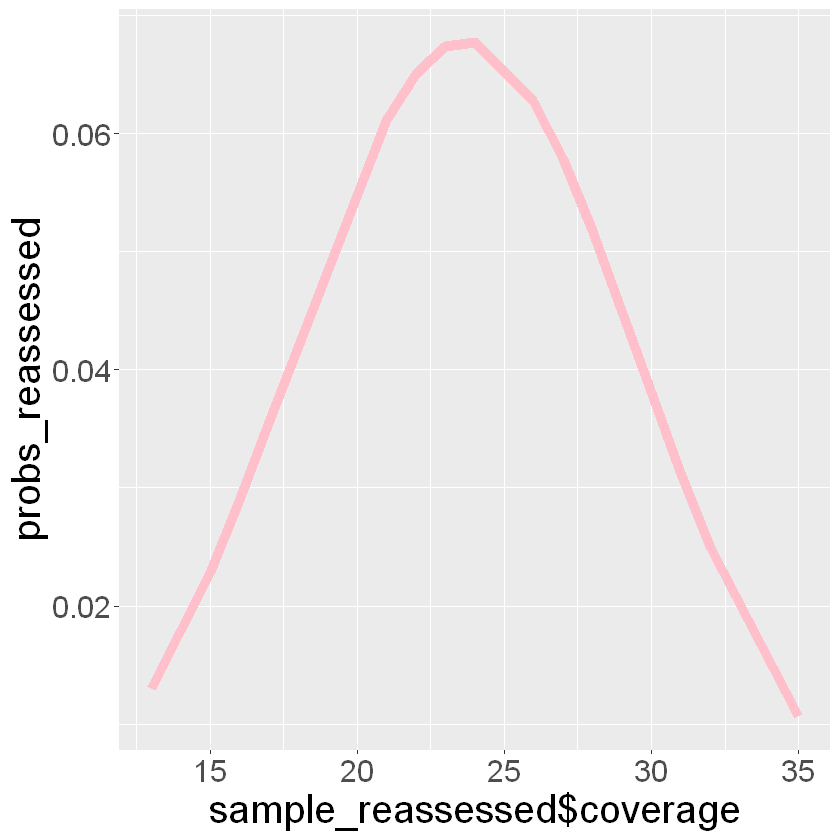


	Welch Two Sample t-test

data:  real_population_coverage and sample_reassessed$coverage
t = -2.4159, df = 24.038, p-value = 0.02366
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.2753165 -0.4146835
sample estimates:
mean of x mean of y 
   20.835    23.680 


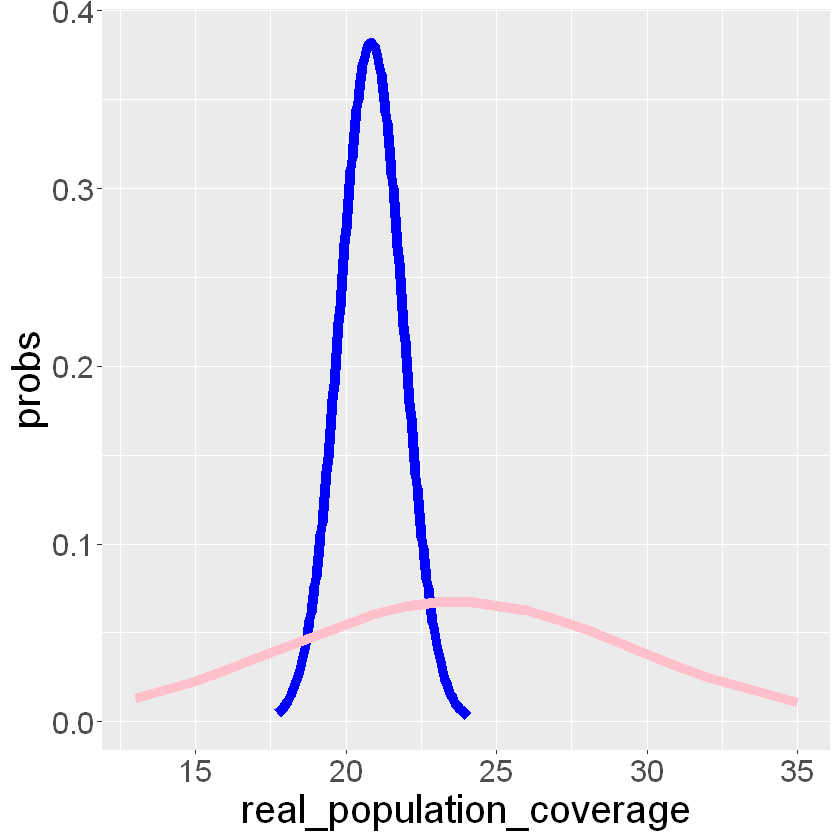

In [1]:
##Set working directory
setwd("~/U_of_H/FALL_2021/MBIO612/Week_6")

#download necessary libraries
library(tidyverse)

#load data
data_percent_cover = read_csv ("survey_2018.csv")
sample_reassessed <- read.table(file= "re_sample_2021.csv", sep = " ")


#Find the real distribution of 2018
n = 1000
real_population_coverage <- n %>%
  replicate(sample(data_percent_cover$coverage, 25))%>%
  t() %>%
  apply(  1, mean)


#find the parameters of the distribution (mean and variance)

mean_data_percent_cover <- mean(real_population_coverage)
sd_data_percent_cover <- sd(real_population_coverage)

#Plot the data from 2018
#compute probability density function according following a normal distribution of
# assumed under H0
probs =mapply(dnorm, real_population_coverage, mean = mean_data_percent_cover, sd = sd_data_percent_cover)

#Plot the gaussian curve for data from 2018
ggplot() + 
  geom_line(aes(x=real_population_coverage, y=probs), size=3, col= "blue") +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18))


#find the parameters of the distribution (mean and variance)
mean_sample_reassessed <- mean(sample_reassessed$coverage)
sd_sample_reassessed <- sd(sample_reassessed$coverage)


#compute probability densite function according following a normal distribution of
# assumed under H0
probs_reassessed =mapply(dnorm, sample_reassessed$coverage, mean = mean_sample_reassessed, sd = sd_sample_reassessed)

#Plot the new gaussian curve
ggplot() + 
  geom_line(aes(x=sample_reassessed$coverage, y=probs_reassessed), size=3, col="pink") +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18))

#plot both gaussian curves together
ggplot() + 
  geom_line(aes(x=real_population_coverage, y=probs), size=3, color="blue") +
  geom_line(aes(x=sample_reassessed$coverage, y=probs_reassessed), size=3, color= "pink") +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18))

#Test whether or not the distributions are different
#Compute t-test
t.test(real_population_coverage,sample_reassessed$coverage)

After comparing the two distributions, we obtain a p-value of 0.02366 (df= 24.038), which is inferior than the alpha treshold of 0.05. In this case, our null hypothesis was that our there is no significant difference between the means of the samples that were re-assessed in 2021 and the mean of the true population. We hypothesiezed (alternative hypothesis) that the environmental stressor that occurred caused a decline in species X's coverage, which would translate into two different means for both distributions. Our p-value indicates that we can reject the null hypothesis and conclude that the two distributions are significantly different (and that they have different means and variances). Those results can be vizualised by the plot, where the blue curve represents the 2018 sampling (or the entire population), while the pink curve represent the re-asssesment of 25 quadrats. We can see that there is an overlap between the two curves. However, the pink curve is more spread out, indicating a greater variance of the data. It also seems like the pink curve is skewed towards a greater % coverage of corals, suggesting that corals sampled over the re-assessment of 2021 have, in average, a higher percent coverage than the true population.  Therefore, we can say that the environemental stressors had a significant effect on the coral percent cover of species X, but it doesn't seem to indicate a decline. 